# Visualizing earnings based on college majors.

## This dataset is about job outcomes of students who graduated from college in the years between 2010 - 2012. The data was released by American Community Survey, cleaned by FiveThirtyEight and released on their Github repo. 

#### This project is also a part of Dataquest and we'll be working on analysis and in particular visualizing the data. We'll play the role of an analyst and answer questions such as:
#### Do students in popular majors make more money? Are there majors which are predominantly male? Female? And other questions that arise.

# Importing the necessary libraries and initial exploration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
# display the first 10 rows.
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [4]:
# display the last 5 rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
raw_data_count = recent_grads.shape
print(raw_data_count)

(173, 21)


#### Above we had an quick glance at the dataset and discovered that there were only a few rows with missing values, so we will simply drop the rows with missing values and assign it back to the dataframe.

In [7]:
recent_grads = recent_grads.dropna()

In [8]:
cleaned_data_count = recent_grads.shape
print(cleaned_data_count)

(172, 21)


On the onset, the dataset was not too dirty, which is fine because we are interested in visualization. However, we did drop the one empty row and now the dataset is clean.

In [9]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Scatter Plots

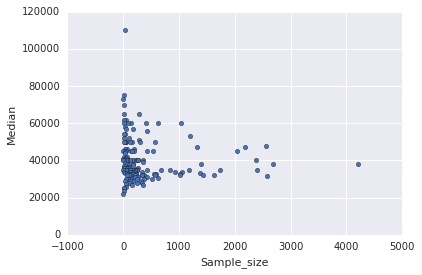

In [26]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

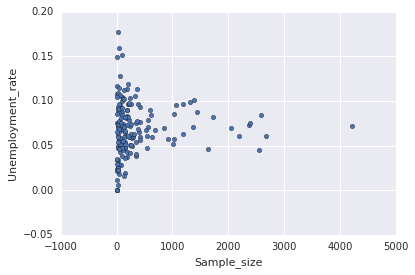

In [11]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

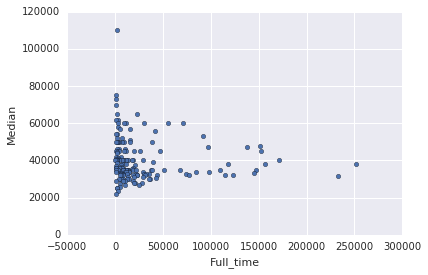

In [12]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

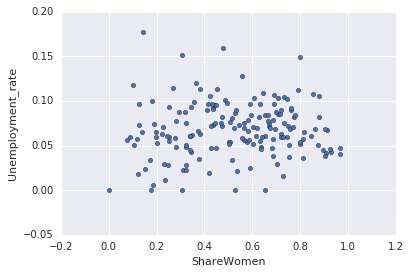

In [13]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

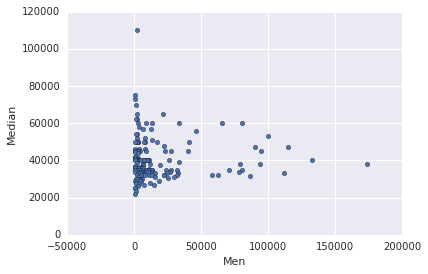

In [14]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

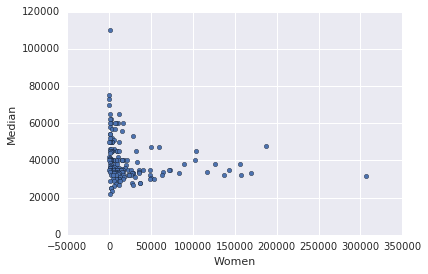

In [15]:
recent_grads.plot(x='Women', y='Median', kind='scatter',)

## The scatter plots are good at giving a general spread of the data, however, they are not the best at giving a clear picture, therefore it may be better to use something like hexbin, or heatmap later on to get a more concise picture.

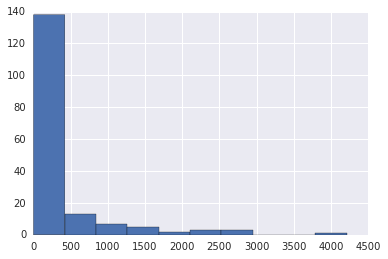

In [17]:
recent_grads['Sample_size'].hist()

## Distribution of Median Salary.

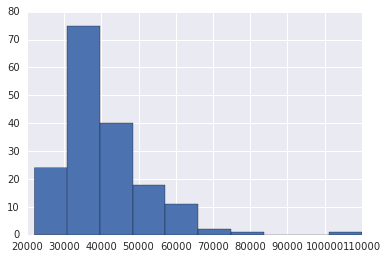

In [18]:
recent_grads['Median'].hist()

The most common median salary range is between 30 and 40 thousand according to the distribution above.

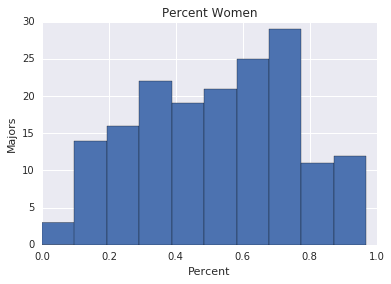

In [19]:
recent_grads['ShareWomen'].hist()
plt.title('Percent Women')
plt.ylabel('Majors')
plt.xlabel('Percent')

In [20]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c7d010630>,
      dtype=object)

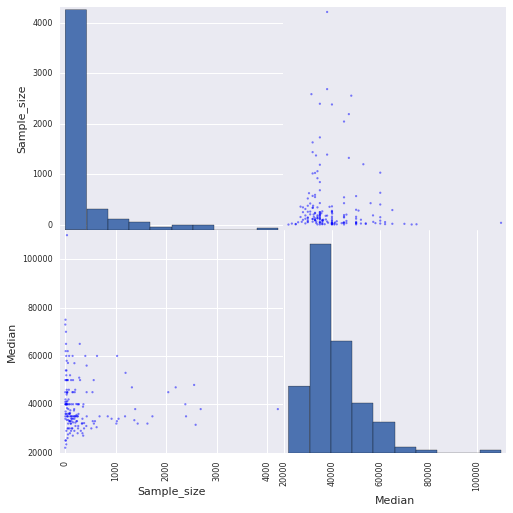

In [21]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(8, 8))

## Visualizing the percent of women based on major.

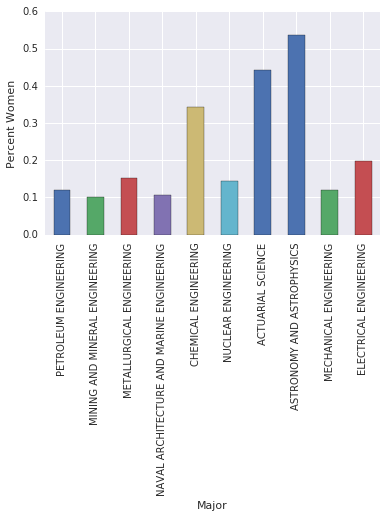

In [22]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.ylabel('Percent Women')

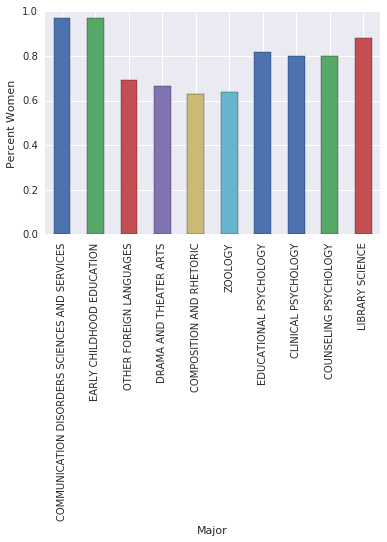

In [23]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.ylabel('Percent Women')

So, after analyzing the first 10 and the last 10 rows of our dataset, we can see that the most predominantly female majors are Communication Disorder Sciences, Early Childhood Education, meanwhile the most predominantly male majors are Petroleum engineering and Mining and Mineral engineering.

## Looking at unemployment rate by Major.

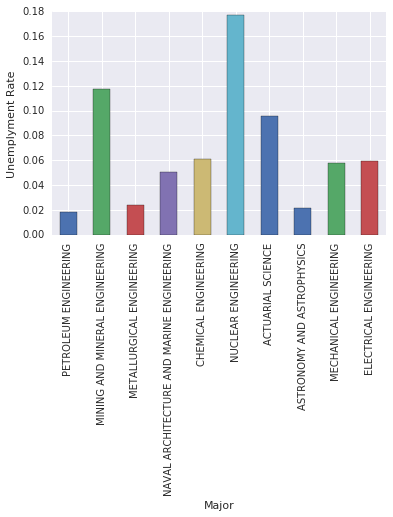

In [24]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
plt.ylabel('Unemplyment Rate')

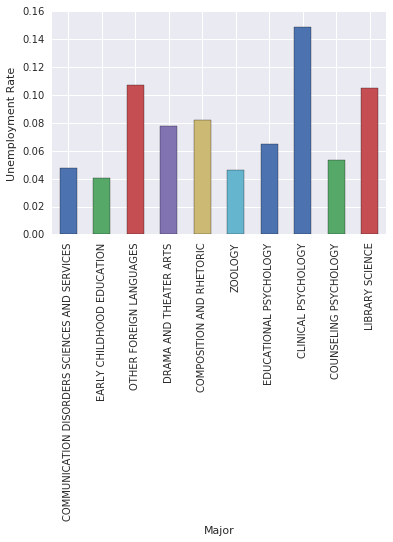

In [25]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)
plt.ylabel('Unemployment Rate')

It looks like the highest unemployment rate majors are Nuclear Engineering and Clinical Psychology.

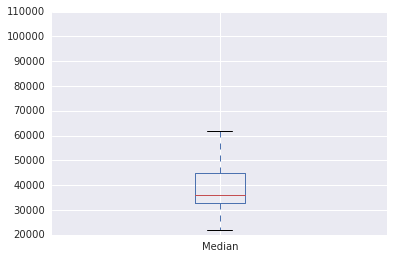

In [31]:
recent_grads[['Median']].plot.box()

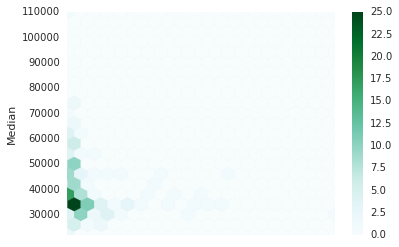

In [43]:
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=20)

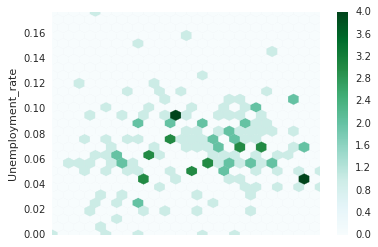

In [46]:
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate', gridsize=25)